<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/86345471/221379942-51f24819-1f76-4289-8dee-06ea69f730f6.png" alt=Main "KPI />
</d>


<hr>

**Завдання**: Використовуючи модель логістичної регресії, виконати класифікацію програмного забезпечення на шкідливе та безпечне на даних датасету
https://www.kaggle.com/datasets/piyushrumao/malware-executable-detection


**Теорія**: Модель логістичної регресії (Linear Regression) – це статистичний метод, який використовується для вирішення задач класифікації. Вона передбачає ймовірність належності об'єкта до одного з двох класів (бінарна класифікація). Хоча назва включає слово "регресія", цей метод використовується для класифікації, а не для передбачення неперервних значень, як у випадку лінійної регресії.

<hr>

### 1. Імпорт бібліотек

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score 

### 2. Завантаження даних

In [2]:
file_path = './uci_malware_detection.csv'
df = pd.read_csv(file_path)

### 3. Огляд даних

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dtypes: int64(531), object(1)
memory usage: 1.5+ MB


In [4]:
df.describe()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
count,373.000000,373.0,373.000000,373.000000,373.000000,373.0,373.000000,373.0,373.000000,373.0,...,373.00000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.997319,0.0,0.994638,0.002681,0.994638,0.0,0.994638,0.0,0.994638,0.0,...,0.10992,0.107239,0.088472,0.099196,0.522788,0.040214,0.091153,0.080429,0.530831,0.144772
std,0.051778,0.0,0.073127,0.051778,0.073127,0.0,0.073127,0.0,0.073127,0.0,...,0.31321,0.309832,0.284361,0.299326,0.500151,0.196726,0.288213,0.272321,0.499719,0.352344
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df['Label'].value_counts()

malicious        301
non-malicious     72
Name: Label, dtype: int64

In [6]:
if df.isnull().sum().any():
    df = df.dropna()

### 4. Попередня обробка даних

In [7]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [8]:
X = df.drop(columns=['Label'])
y = df['Label']

### 5. Розділення на навчальні та тестові дані

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 6. Стандартизація даних

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  7. Навчання моделі логістичної регресії

In [11]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### 8. Прогнозування

In [12]:
y_pred = logreg.predict(X_test)

### 9. Оцінка моделі

In [13]:
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.95      1.00      0.98        21

    accuracy                           0.99        94
   macro avg       0.98      0.99      0.98        94
weighted avg       0.99      0.99      0.99        94

Confusion Matrix:
 [[72  1]
 [ 0 21]]


### 10. Візуалізація результатів

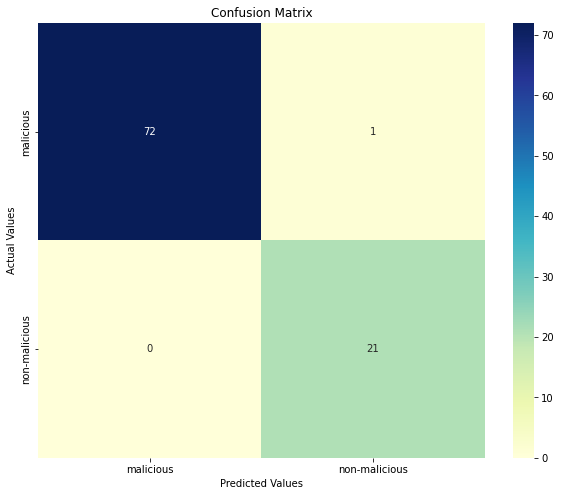

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

<hr>

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Text(0.3, 0.8, 'ROC Curve')

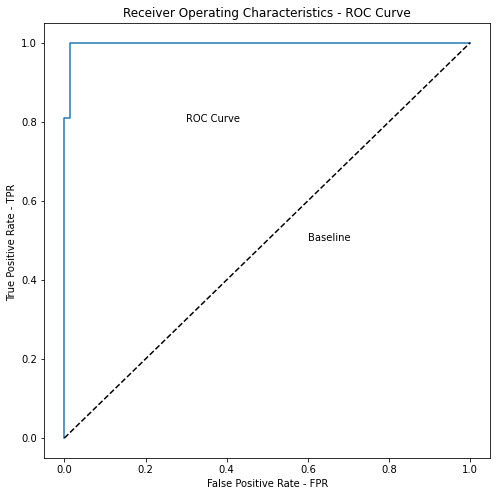

In [16]:
probabilities = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
%matplotlib inline

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color="black", linestyle="--")

plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6, 0.5, "Baseline")
plt.text(0.3, 0.8, "ROC Curve")

In [17]:
print("Area Under the Curve:", round(roc_auc_score(y_test, probabilities), 3))

Area Under the Curve: 0.997


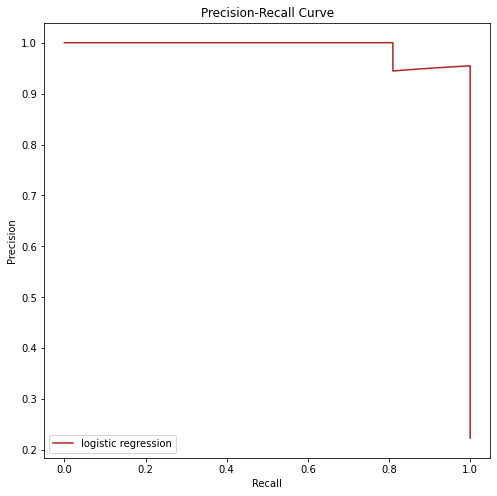

In [18]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(recall, precision, label='logistic regression', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

ax.legend()

<hr>

**Отже, модель досить добре справляється з класифікацією шкідливого програмного забезпечення, показуючи високу точність і повноту.**